In [2]:
import gzip
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [20]:
experiment_dir = '/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFree-v0/2019-09-23T14-57-12-rnd_only_data_collection_free_screw_state_check/id=*'

aggregated = {}

for path in glob.iglob(experiment_dir):
    # Aggregate all checkpoint replay pools
    for ckpt_path in glob.iglob(os.path.join(path, 'checkpoint_*')):
        print(ckpt_path)
        ckpt_fn = os.path.join(ckpt_path, 'replay_pool.pkl')
        with gzip.open(ckpt_fn, 'rb') as f:
            ckpt_data = pickle.load(f)
            
        observations = ckpt_data['observations']
        for k, v in observations.items():
            if k not in aggregated:
                aggregated[k] = v
            else:
                aggregated[k] = np.concatenate([aggregated[k], v])
        print(ckpt_data.keys())

/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFree-v0/2019-09-23T14-57-12-rnd_only_data_collection_free_screw_state_check/id=1966ad2a-seed=6628_2019-09-23_14-57-13_roxx1mz/checkpoint_50
dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'episode_index_forwards', 'episode_index_backwards'])
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFree-v0/2019-09-23T14-57-12-rnd_only_data_collection_free_screw_state_check/id=1966ad2a-seed=6628_2019-09-23_14-57-13_roxx1mz/checkpoint_100
dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'episode_index_forwards', 'episode_index_backwards'])
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFree-v0/2019-09-23T14-57-12-rnd_only_data_collection_free_screw_state_check/id=1966ad2a-seed=6628_2019-09-23_14-57-13_roxx1mz/checkpoint_150
dict_keys(['observations', 'next_observations', 'actions', 'rewards', 'terminals', 'episode_index_forwards', 'episode_index_backwards

In [14]:
[v.shape for v in aggregated.values()]

[(152500, 9),
 (152500, 9),
 (152500, 2),
 (152500, 1),
 (152500, 1),
 (152500, 32, 32, 3)]

In [16]:
aggregated.keys()

dict_keys(['claw_qpos', 'last_action', 'object_xy_position', 'object_z_orientation_cos', 'object_z_orientation_sin', 'pixels'])

In [21]:
def plot_pos_support(x, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, alpha=0.1, s=5)
    plt.show()

def plot_angle_support(z_cos, z_sin):
    plt.figure(figsize=(5,5))
    angles = np.arctan2(z_sin, z_cos)
    plt.hist(angles, bins=50)
    plt.show()

In [22]:
x, y = (
    aggregated['object_xy_position'][:, 0],
    aggregated['object_xy_position'][:, 1]
)
z_cos, z_sin = (
    aggregated['object_z_orientation_cos'],
    aggregated['object_z_orientation_sin']
)

In [23]:
x.shape, y.shape, z_cos.shape, z_sin.shape

((457500,), (457500,), (457500, 1), (457500, 1))

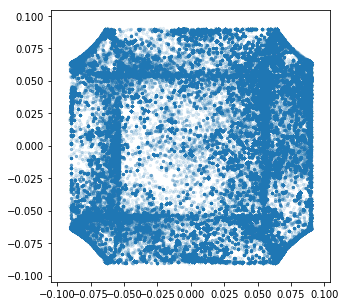

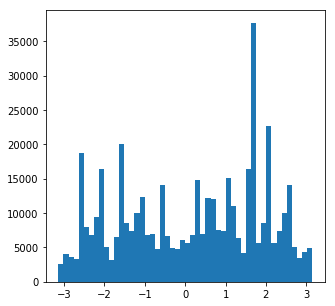

In [24]:
plot_pos_support(x, y)
plot_angle_support(z_cos, z_sin)

In [25]:
with gzip.open('./rnd_collected_data_free_screw.pkl', 'wb') as f:
    pickle.dump(aggregated, f, protocol=4)